In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn
import os
import cartopy.crs as ccrs
import pandas as pd

In [2]:
# TODO:
## add pandas export to csv
## add seaborn palette change

In [3]:
# get paths. Note the 1.87GB netcdf gebco dataset has been downloaded
path_root = os.getcwd()
path_in = os.path.join(os.path.dirname(path_root),'_raw')
path_out = os.path.join(path_root,'subset')

In [4]:
# create an xarray data array from the raw netcdf file
da = xr.open_dataarray(os.path.join(path_in,'GEBCO_2014_2D.nc'))

In [5]:
# print data array metadata
da

<xarray.DataArray 'elevation' (lat: 21600, lon: 43200)>
[933120000 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.99 -89.98 -89.97 -89.96 -89.95 -89.95 ...
  * lon      (lon) float64 -180.0 -180.0 -180.0 -180.0 -180.0 -180.0 -179.9 ...
Attributes:
    standard_name:       height_above_reference_ellipsoid
    long_name:           Elevation relative to sea level
    units:               m
    sdn_parameter_urn:   SDN:P01::BATHHGHT
    sdn_parameter_name:  Sea floor height (above mean sea level) {bathymetric...
    sdn_uom_urn:         SDN:P06:ULAA
    sdn_uom_name:        Metres

In [6]:
# print dimension names of the data array
da.dims

('lat', 'lon')

In [7]:
# print the attributes of the dataset
da.attrs

OrderedDict([('standard_name', 'height_above_reference_ellipsoid'),
             ('long_name', 'Elevation relative to sea level'),
             ('units', 'm'),
             ('sdn_parameter_urn', 'SDN:P01::BATHHGHT'),
             ('sdn_parameter_name',
              'Sea floor height (above mean sea level) {bathymetric height}'),
             ('sdn_uom_urn', 'SDN:P06:ULAA'),
             ('sdn_uom_name', 'Metres')])

In [8]:
# print coordinates of the data array as a python list, limiting to the first 3 items
# "xarraydataarry.values > ".values" converts to a numpy array
# ".tolist()" is a method to convert the numpy array to a python list
# list[0:3] or written as "list[:3]" displays list item number "0", "1", "2", "3".
da.coords['lat'].values.tolist()[0:4]

[-89.99583333333332, -89.9875, -89.97916666666666, -89.97083333333333]

In [9]:
# spatially subset the big grid to a smaller grid for Europe (easier to handle)
subset = da.where((-10 < da.lon) & (da.lon < 10) & (50 < da.lat) & (da.lat < 70), drop=True)

In [10]:
# print the min and max of the data subset
print('min = ' + str(subset.min().item(0)) + '\nmax = ' + str(subset.max().item(0)))

min = -3948.0
max = 2292.0


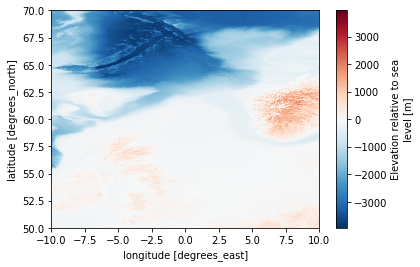

In [11]:
# plot the grid using xarray "plot" which defaults to matplotlib the "pcolormesh" type
subset.plot();

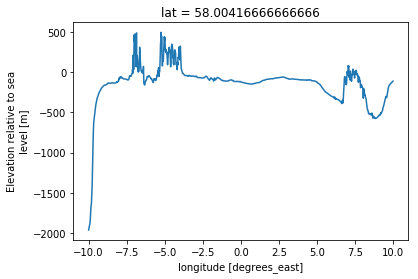

In [141]:
# plot a proflie across the grid at a given latitude
subset.sel(lat=58,method='nearest').plot.line();

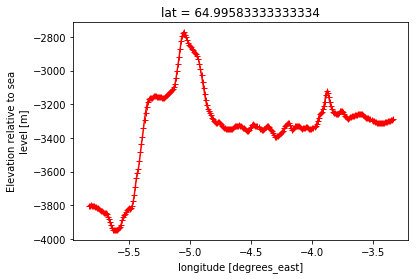

In [138]:
# you can do lots here, slice the array i.e. just present array items with an index between 500 and 800
# also, you can pass in matplotlib key word arguements (kwargs) setting line color and marker type (amongst others)
subset.sel(lat=65,method='nearest')[500:800].plot.line(color='red', marker='+');

In [137]:
# export the DEM profile to a csv making sure the columns are order by lon,lat,depth ie x,y,z

# create a pandas dataframe for a given index value the latitude nearest 65 degrees)
df = subset.sel(lat=65,method='nearest').to_dataframe(name='z')

# we don't need an index for x,y,z data
df = df.reset_index()

# renmae the column headers in the pandas dataframe
df.columns = ['x','y','z']

# print the top 5 rows
df.head(5)

,x,y,z
0,-9.995833,64.995833,-734.0
1,-9.987500,64.995833,-738.0
2,-9.979167,64.995833,-741.0
3,-9.970833,64.995833,-745.0
4,-9.962500,64.995833,-748.0


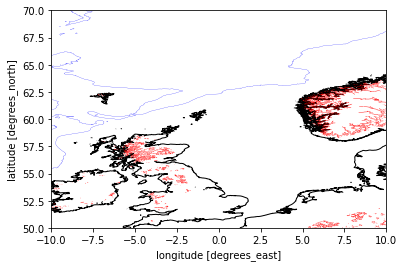

In [15]:
# get funky with kwargs, e.g. with specifying lists of arguements (note the number of items stays the same)
# there's plenty of functionality, e.g. list colours accepting different types of input.
# we've got 3 elevation contours specifed, with different colours applied, and different line weights
subset.plot.contour(colors=['blue','#000000','r'],levels=[-1000,0,500],linewidths=[0.2,1,0.2]);

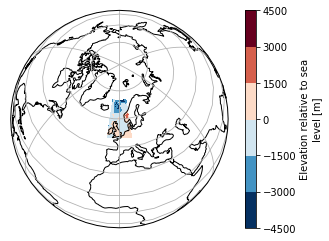

In [16]:
# plot on a globe i.e using a Orthographic projection using cartopy package
ax = plt.axes(projection=ccrs.Orthographic(-0, 60))
subset.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global();
ax.gridlines();
ax.coastlines();

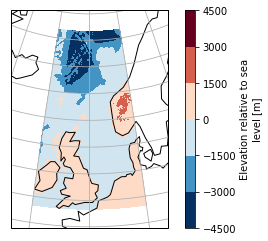

In [17]:
# zoom to a fixed extent
ax = plt.axes(projection=ccrs.Orthographic(-0, 60));
subset.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_extent([-13, 13, 47, 72]);
ax.gridlines();
ax.coastlines();

(array([ 269472.,  590912.,  249478.,  350886.,  459015.,  672549.,
        2894604.,  186971.,   81854.,    4259.]),
 array([-3948., -3324., -2700., -2076., -1452.,  -828.,  -204.,   420.,
         1044.,  1668.,  2292.]),
 <a list of 10 Patch objects>)

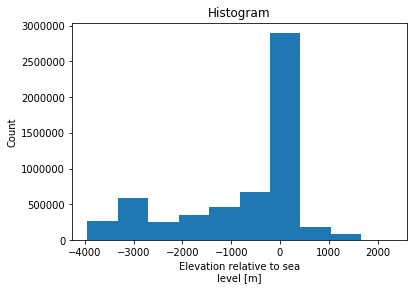

In [18]:
# plot a histogram of data values 
subset.plot.hist()